In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

CALLS – refreshed monthly (2020-2024 available)

In [3]:
calls = pd.read_csv('/Users/pendovka/Desktop/Data/Central Intake Service Queue Data.csv')

calls['Date'] = pd.to_datetime(calls['Date'])

result = calls.groupby(calls['Date'].dt.year)['Unmatched callers'].sum()
print(result)


Date
2020     2253
2021    10903
2022    38483
2023    73532
Name: Unmatched callers, dtype: int64


OCCUPANCY  – refreshed daily (2021-2024 available)

In [4]:
occupancy = pd.read_csv('/Users/pendovka/Desktop/Data/daily-shelter-overnight-service-occupancy-capacity-2023.csv')

occupancy['OCCUPANCY_DATE'] = pd.to_datetime(occupancy['OCCUPANCY_DATE'])
occupancy = occupancy[occupancy['OVERNIGHT_SERVICE_TYPE'] == 'Shelter']
occupancy.set_index('_id', inplace=True, drop=True)


occupancy_cleaned = occupancy.dropna(subset=['OCCUPANCY_RATE_BEDS'])
occupancy_result = occupancy_cleaned.groupby('LOCATION_ADDRESS')['OCCUPANCY_RATE_BEDS'].mean()
occupancy_sorted = occupancy_result.sort_values(ascending=True)

print(f"median occupancy rate throughout the year: {occupancy_cleaned['OCCUPANCY_RATE_BEDS'].median():.2f}")

occupancy_sorted.head(10)

median occupancy rate throughout the year: 100.00


LOCATION_ADDRESS
558 Bathurst St        80.239370
111 Spadina Rd         82.058988
100 Lippincott St      86.095890
20 Gerrard St E        86.789270
35 Sydenham St         87.890411
490 Sherbourne St      88.862767
26 Vaughan Rd          91.443890
1651 Sheppard Ave W    92.469425
6 Warrendale Ct        92.778973
129 Peter St           93.497452
Name: OCCUPANCY_RATE_BEDS, dtype: float64

SHELTER_FLOW – refreshed monthly (2018-2023 avaiable)

In [5]:
shelter_flow = pd.read_csv('/Users/pendovka/Desktop/Data/toronto-shelter-system-flow.csv')
shelter_flow.set_index('_id', inplace=True, drop=True)
shelter_flow.rename(columns={'date(mmm-yy)': 'Date'}, inplace=True)
shelter_flow['date'] = pd.to_datetime(shelter_flow['Date'], format='%b-%y')

shelter_flow.head()


,Date,population_group,returned_from_housing,returned_to_shelter,newly_identified,moved_to_housing,became_inactive,actively_homeless,ageunder16,age16-24,age25-44,age45-64,age65over,gender_male,gender_female,"gender_transgender,non-binary_or_two_spirit",population_group_percentage,date
_id,,,,,,,,,,,,,,,,,,
1,Jan-18,All Population,46,494,1106,508,862,7958,1233,1111,2901,2291,422,4963,2912,83,100.0%,2018-01-01
2,Jan-18,Chronic,11,29,317,111,111,2532,223,346,716,1000,247,1632,870,30,31.8%,2018-01-01
3,Jan-18,Refugees,4,32,651,328,75,2408,914,241,961,270,22,1219,1177,12,30.3%,2018-01-01
4,Jan-18,Families,0,14,561,321,57,2277,1232,187,687,153,18,968,1308,1,28.6%,2018-01-01
5,Jan-18,Youth,12,64,116,44,116,924,0,924,0,0,0,571,312,41,11.6%,2018-01-01


key idea: try to predict shelter traffic levels based on the number of calls + weather? + number of currently occupied beds.
show 
descrepancy in the supply/demand for beds. or show the 'chance' of finding a bed for that particular night based on given predictors.

In [6]:
merged_calls_occupancy_2023 = pd.merge(occupancy, calls, left_on='OCCUPANCY_DATE', right_on='Date', how='inner')
merged_calls_occupancy_2023.rename(columns={'OCCUPANCY_DATE': 'DATE'}, inplace=True)

merged_calls_occupancy_2023.drop(columns=['Date'], inplace=True)

merged_calls_occupancy_2023.head()


,DATE,ORGANIZATION_ID,ORGANIZATION_NAME,SHELTER_ID,SHELTER_GROUP,LOCATION_ID,LOCATION_NAME,LOCATION_ADDRESS,LOCATION_POSTAL_CODE,LOCATION_CITY,...,CAPACITY_FUNDING_ROOM,OCCUPIED_ROOMS,UNOCCUPIED_ROOMS,UNAVAILABLE_ROOMS,OCCUPANCY_RATE_BEDS,OCCUPANCY_RATE_ROOMS,_id,Unmatched callers,Single call,Repeat caller
0,2023-01-01,24,COSTI Immigrant Services,40,COSTI Reception Centre,1051,COSTI Reception Centre,100 Lippincott St,M5S 2P1,Toronto,...,NaN,NaN,NaN,NaN,100.0,NaN,794,131,52,79
1,2023-01-01,14,Christie Ossington Neighbourhood Centre,22,Christie Ossington Men's Hostel,1029,CONC Men's Shelter Lansdowne Ave,973 Lansdowne Ave,M6H 3Z5,Toronto,...,NaN,NaN,NaN,NaN,100.0,NaN,794,131,52,79
2,2023-01-01,14,Christie Ossington Neighbourhood Centre,22,Christie Ossington Men's Hostel,1102,CONC Men's Shelter Bloor St W,850 Bloor St W,M6G 1M2,Toronto,...,NaN,NaN,NaN,NaN,100.0,NaN,794,131,52,79
3,2023-01-01,23,"Christie Refugee Welcome Centre, Inc.",39,Christie Refugee Welcome Centre,1052,Christie Refugee Welcome Centre,43 Christie St,M6G 3B1,Toronto,...,30.0,27.0,1.0,2.0,NaN,96.43,794,131,52,79
4,2023-01-01,1,City of Toronto,53,Birkdale Residence,1070,SSHA Birkdale Residence,1229 Ellesmere Rd,M1P 4V8,Toronto,...,65.0,64.0,0.0,1.0,NaN,100.00,794,131,52,79


In [7]:
grouped_by_date = merged_calls_occupancy_2023.groupby('DATE').agg({
    'Unmatched callers': 'first',
    'OCCUPANCY_RATE_BEDS': 'mean'
}).reset_index()

print(grouped_by_date.head())

# Create a new column for the sum of 'Unmatched callers', 'Single call', and 'Repeat caller'
correlation = grouped_by_date['Unmatched callers'].corr(grouped_by_date['OCCUPANCY_RATE_BEDS'])

print(f"Correlation between Unmatched and Occupancy Rate Beds: {correlation}")


        DATE  Unmatched callers  OCCUPANCY_RATE_BEDS
0 2023-01-01                131            97.048250
1 2023-01-02                135            96.959875
2 2023-01-03                132            96.862000
3 2023-01-04                121            97.081375
4 2023-01-05                123            96.864875
Correlation between Unmatched and Occupancy Rate Beds: -0.03540867355280093


let's check a more detailed calls data

In [8]:
calls_full = pd.read_csv('/Users/pendovka/Desktop/Data/Central Intake Call Wrap-Up Codes Data.csv')
calls_full['Date'] = pd.to_datetime(calls['Date'])
calls_full.rename(columns = {'Code 3B - Shelter Space Unavailable - Individuals/Couples' : 'shelter_unavilable'}, inplace = True)

merged_calls_occupancy_2023_full= pd.merge(occupancy, calls_full, left_on='OCCUPANCY_DATE', right_on='Date', how='inner')
merged_calls_occupancy_2023_full.rename(columns={'OCCUPANCY_DATE': 'DATE'}, inplace=True)

merged_calls_occupancy_2023_full.drop(columns=['Date'], inplace=True)

grouped_by_date_full = merged_calls_occupancy_2023_full.groupby('DATE').agg({
    'shelter_unavilable': 'first',
    'OCCUPANCY_RATE_BEDS': 'mean'
}).reset_index()


# Create a new column for the sum of 'Unmatched callers', 'Single call', and 'Repeat caller'
correlation_full = grouped_by_date_full['shelter_unavilable'].corr(grouped_by_date_full['OCCUPANCY_RATE_BEDS'])

print(f"Correlation between Total calls and Occupancy Rate Beds: {correlation_full}")
grouped_by_date_full.head()

Correlation between Total calls and Occupancy Rate Beds: -0.0368098865149051


,DATE,shelter_unavilable,OCCUPANCY_RATE_BEDS
0,2023-01-01,164,97.048250
1,2023-01-02,177,96.959875
2,2023-01-03,140,96.862000
3,2023-01-04,183,97.081375
4,2023-01-05,190,96.864875


no correlation. occupancy_rate_beds is not the best choice for a response varible since it barely varies – most shelters are constistently at full occupancy.


In [9]:
occupancy.set_index('OCCUPANCY_DATE', inplace=True)

In [10]:
monthly_average_occupancy_rate = occupancy['OCCUPANCY_RATE_BEDS'].resample('MS').mean()

occupancy.head()


,ORGANIZATION_ID,ORGANIZATION_NAME,SHELTER_ID,SHELTER_GROUP,LOCATION_ID,LOCATION_NAME,LOCATION_ADDRESS,LOCATION_POSTAL_CODE,LOCATION_CITY,LOCATION_PROVINCE,...,OCCUPIED_BEDS,UNOCCUPIED_BEDS,UNAVAILABLE_BEDS,CAPACITY_ACTUAL_ROOM,CAPACITY_FUNDING_ROOM,OCCUPIED_ROOMS,UNOCCUPIED_ROOMS,UNAVAILABLE_ROOMS,OCCUPANCY_RATE_BEDS,OCCUPANCY_RATE_ROOMS
OCCUPANCY_DATE,,,,,,,,,,,,,,,,,,,,,
2023-01-01,24,COSTI Immigrant Services,40,COSTI Reception Centre,1051,COSTI Reception Centre,100 Lippincott St,M5S 2P1,Toronto,ON,...,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN
2023-01-01,14,Christie Ossington Neighbourhood Centre,22,Christie Ossington Men's Hostel,1029,CONC Men's Shelter Lansdowne Ave,973 Lansdowne Ave,M6H 3Z5,Toronto,ON,...,39.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN
2023-01-01,14,Christie Ossington Neighbourhood Centre,22,Christie Ossington Men's Hostel,1102,CONC Men's Shelter Bloor St W,850 Bloor St W,M6G 1M2,Toronto,ON,...,18.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN
2023-01-01,23,"Christie Refugee Welcome Centre, Inc.",39,Christie Refugee Welcome Centre,1052,Christie Refugee Welcome Centre,43 Christie St,M6G 3B1,Toronto,ON,...,NaN,NaN,NaN,28.0,30.0,27.0,1.0,2.0,NaN,96.43
2023-01-01,1,City of Toronto,53,Birkdale Residence,1070,SSHA Birkdale Residence,1229 Ellesmere Rd,M1P 4V8,Toronto,ON,...,NaN,NaN,NaN,64.0,65.0,64.0,0.0,1.0,NaN,100.00


In [11]:
merged_flow_occupancy_2023 = pd.merge(monthly_average_occupancy_rate, shelter_flow, left_on='OCCUPANCY_DATE', right_on='date', how='inner')

date_column = merged_flow_occupancy_2023['date']
merged_flow_occupancy_2023.drop(columns=['date'], inplace=True)
merged_flow_occupancy_2023.drop(columns=['Date'], inplace=True)
merged_flow_occupancy_2023.insert(0, 'Date', date_column)

merged_flow_occupancy_2023.head()


,Date,OCCUPANCY_RATE_BEDS,population_group,returned_from_housing,returned_to_shelter,newly_identified,moved_to_housing,became_inactive,actively_homeless,ageunder16,age16-24,age25-44,age45-64,age65over,gender_male,gender_female,"gender_transgender,non-binary_or_two_spirit",population_group_percentage
0,2023-01-01,97.254554,All Population,75,441,813,448,546,10702,1272,1242,4494,3082,612,6511,4018,173,100.0%
1,2023-01-01,97.254554,Chronic,8,56,556,284,190,5015,387,501,1811,1859,457,3140,1784,91,46.9%
2,2023-01-01,97.254554,Refugees,16,30,339,248,97,3575,795,502,1720,518,40,1914,1641,20,33.4%
3,2023-01-01,97.254554,Families,22,14,220,224,50,2508,1245,281,743,223,16,1068,1437,3,23.4%
4,2023-01-01,97.254554,Youth,13,25,103,34,68,959,0,959,0,0,0,538,354,67,9.0%


In [12]:
calls_full.set_index('Date', inplace=True)


In [13]:
monthly_calls_unavailable = calls_full['shelter_unavilable'].resample('MS').sum()
monthly_number_calls = calls_full['Total calls handled'].resample('MS').sum()

monthly_calls = pd.merge(monthly_calls_unavailable, monthly_number_calls, on= 'Date', how='inner')
monthly_calls['unavailable_ratio'] = (monthly_calls['shelter_unavilable'] / monthly_calls['Total calls handled'])


shelter_flow = pd.read_csv('/Users/pendovka/Desktop/Data/toronto-shelter-system-flow.csv')

shelter_flow.rename(columns={'date(mmm-yy)': 'Date'}, inplace=True)
shelter_flow['Date'] = pd.to_datetime(shelter_flow['Date'], format='%b-%y')
shelter_flow = shelter_flow[shelter_flow['population_group'] == 'All Population']
monthly_calls.head()


,shelter_unavilable,Total calls handled,unavailable_ratio
Date,,,
2020-10-01,183,782,0.234015
2020-11-01,1872,11734,0.159536
2020-12-01,1572,11693,0.134439
2021-01-01,2374,14313,0.165863
2021-02-01,1630,11924,0.136699


In [14]:
calls = pd.read_csv('/Users/pendovka/Desktop/Data/Central Intake Service Queue Data.csv')

calls['Date'] = pd.to_datetime(calls['Date'])
calls.set_index('Date', inplace=True)  
monthly_calls_summary = calls['Unmatched callers'].resample('MS').sum()

monthly_calls_summary.head()

monthly_calls_merge = pd.merge(monthly_calls, monthly_calls_summary , on= 'Date', how='inner')

monthly_calls_merge.head()

,shelter_unavilable,Total calls handled,unavailable_ratio,Unmatched callers
Date,,,,
2020-10-01,183,782,0.234015,67
2020-11-01,1872,11734,0.159536,1125
2020-12-01,1572,11693,0.134439,1061
2021-01-01,2374,14313,0.165863,1436
2021-02-01,1630,11924,0.136699,888


In [15]:
merged_calls_flow_monthly = pd.merge(monthly_calls_merge, shelter_flow, on= 'Date', how='inner')

correlation_calls_newlyhomeless = merged_calls_flow_monthly[['Unmatched callers', 'newly_identified']].corr().iloc[0, 1]
correlation_calls_activelyhomeless = merged_calls_flow_monthly[['Unmatched callers', 'actively_homeless']].corr().iloc[0, 1]
correlation_calls_inactive= merged_calls_flow_monthly[['Unmatched callers', 'became_inactive']].corr().iloc[0, 1]


print(f"Correlation between number of unmatched callers and newly homeless: {correlation_calls_newlyhomeless:.2f}")
print(f"Correlation between number of unmatched callers and actively homeless: {correlation_calls_activelyhomeless:.2f}")
print(f"Correlation between number of unmatched callers and inactive homeless: {correlation_calls_inactive:.2f}")



Correlation between number of unmatched callers and newly homeless: 0.36
Correlation between number of unmatched callers and actively homeless: 0.66
Correlation between number of unmatched callers and inactive homeless: -0.35


lowest number of the monthly request denies is observed during the warmer months – need to adjust for seasonality

In [96]:
merged_calls_flow_monthly = merged_calls_flow_monthly[['Date', 'Total calls handled', 'Unmatched callers', 'newly_identified', 'actively_homeless', 'became_inactive', ]]

# Merge all occupancy tables

In [97]:
occupancy2024 = pd.read_csv('/Users/pendovka/Desktop/Data/Daily shelter overnight occupancy.csv')
occupancy2023 = pd.read_csv('/Users/pendovka/Desktop/Data/daily-shelter-overnight-service-occupancy-capacity-2023.csv')
occupancy2022 = pd.read_csv('/Users/pendovka/Desktop/Data/daily-shelter-overnight-service-occupancy-capacity-2022.csv')
occupancy2021 = pd.read_csv('/Users/pendovka/Desktop/Data/daily-shelter-overnight-service-occupancy-capacity-2021.csv')

occupancy2021['OCCUPANCY_DATE'] = pd.to_datetime(occupancy2021['OCCUPANCY_DATE'], format='%y-%m-%d').dt.strftime('%Y-%m-%d')
occupancy2022['OCCUPANCY_DATE'] = pd.to_datetime(occupancy2022['OCCUPANCY_DATE'], format='%y-%m-%d').dt.strftime('%Y-%m-%d')
occupancy2023['OCCUPANCY_DATE'] = pd.to_datetime(occupancy2023['OCCUPANCY_DATE'])
occupancy2024['OCCUPANCY_DATE'] = pd.to_datetime(occupancy2024['OCCUPANCY_DATE'])
occupancy2024.head()


concatenated_occupancy = pd.concat([occupancy2024, occupancy2023, occupancy2022, occupancy2021])
concatenated_occupancy['OCCUPANCY_DATE'] = pd.to_datetime(concatenated_occupancy['OCCUPANCY_DATE'])
concatenated_occupancy.sort_values(by='OCCUPANCY_DATE', inplace=True)
concatenated_occupancy.set_index('OCCUPANCY_DATE', inplace=True)

print(concatenated_occupancy['OVERNIGHT_SERVICE_TYPE'].unique())


['Motel/Hotel Shelter' '24-Hour Respite Site' 'Shelter' 'Interim Housing'
 'Isolation/Recovery Site' 'Warming Centre' "24-Hour Women's Drop-in" nan
 'Alternative Space Protocol']


We need to focus on the first two types of shelters – Motel/Hotel and Interim Housing – since they are most flexible. Let's calculate averate daily capacity for for these.

In [94]:
concatenated_occupancy = concatenated_occupancy[concatenated_occupancy['OVERNIGHT_SERVICE_TYPE'].isin(['Motel/Hotel Shelter', 'Interim Housing'])]

concatenated_occupancy['CAPACITY_ACTUAL_ROOM'] = concatenated_occupancy['CAPACITY_ACTUAL_ROOM'].fillna(0).astype(int)
concatenated_occupancy['CAPACITY_ACTUAL_BED'] = concatenated_occupancy['CAPACITY_ACTUAL_BED'].fillna(0).astype(int)

concatenated_occupancy['capacity'] = concatenated_occupancy['CAPACITY_ACTUAL_ROOM'] + concatenated_occupancy['CAPACITY_ACTUAL_BED']

x = concatenated_occupancy.groupby('OCCUPANCY_DATE')['capacity'].sum()

average_daily_capacity = x.resample('MS').mean().rename('average_daily_capacity').round(2)
average_daily_capacity = average_daily_capacity.to_frame()

# Monthly merged dataset

In [87]:
merged_calls_occupancy_flow_monthly = pd.merge(average_daily_capacity, merged_calls_flow_monthly, left_index=True, right_on='Date', how='inner')

date_column = merged_calls_occupancy_flow_monthly['Date']
merged_calls_occupancy_flow_monthly.drop(columns=['Date'], inplace=True)
merged_calls_occupancy_flow_monthly.insert(0, 'Date', date_column)

merged_calls_occupancy_flow_monthly.tail(10)

,Date,average_daily_capacity,Total calls handled,Unmatched callers,newly_identified,actively_homeless,became_inactive
29,2023-03-01,2817.58,25036,3715,801,10811,683
30,2023-04-01,2758.03,26044,4311,766,10515,787
31,2023-05-01,2716.94,31668,6816,1132,10453,773
32,2023-06-01,2701.43,30470,8206,899,10418,701
33,2023-07-01,2625.39,27248,7411,599,10110,807
34,2023-08-01,2483.87,27039,7572,539,9988,632
35,2023-09-01,2471.83,29938,8339,841,10212,483
36,2023-10-01,2496.16,32986,9030,929,10111,502
37,2023-11-01,2481.33,29461,7359,1113,10498,472
38,2023-12-01,2475.77,21501,5107,886,10607,447


/var/folders/69/x44wvyy100vbnknf789slc000000gn/T/ipykernel_40248/1893815064.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


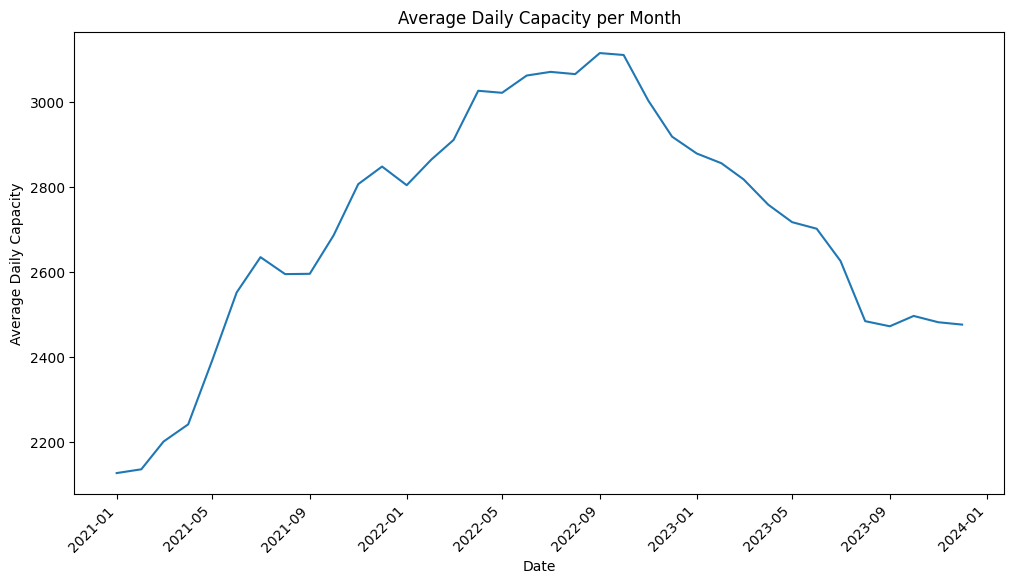

In [91]:
plt.figure(figsize=(12, 6)) 
plot = sns.lineplot(data=merged_calls_occupancy_flow_monthly, x='Date', y='average_daily_capacity')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right') 
plt.xlabel('Date')
plt.ylabel('Average Daily Capacity')
plt.title('Average Daily Capacity per Month')
plt.show()

/var/folders/69/x44wvyy100vbnknf789slc000000gn/T/ipykernel_40248/1643130233.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


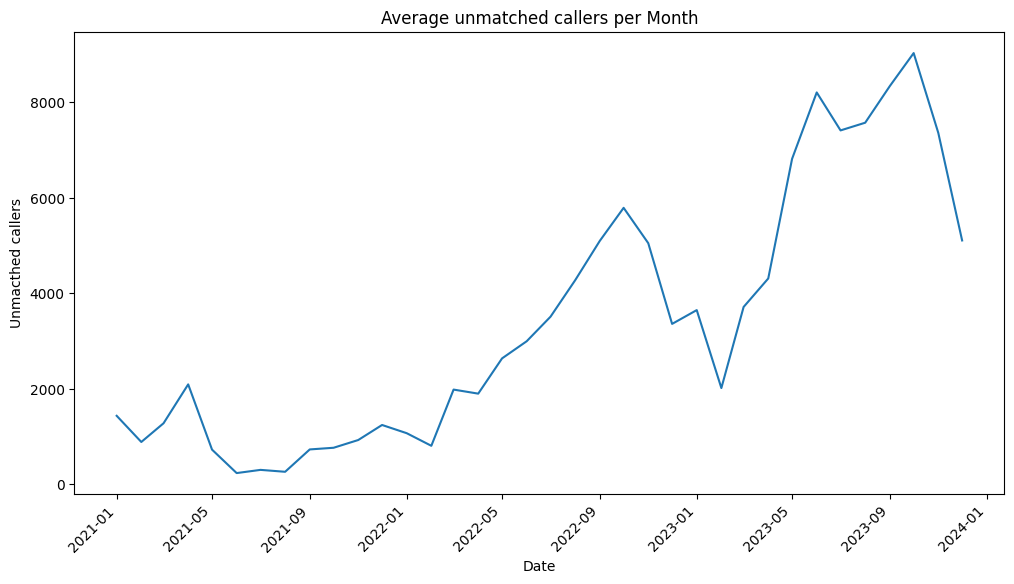

In [93]:
plt.figure(figsize=(12, 6)) 
plot = sns.lineplot(data=merged_calls_occupancy_flow_monthly, x='Date', y='Unmatched callers')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right') 
plt.xlabel('Date')
plt.ylabel('Unmacthed callers')
plt.title('Average unmatched callers per Month')
plt.show()

In [107]:
other_occupancy = concatenated_occupancy[concatenated_occupancy['OVERNIGHT_SERVICE_TYPE'] == 'Shelter']

other_occupancy['CAPACITY_ACTUAL_ROOM'] = other_occupancy['CAPACITY_ACTUAL_ROOM'].fillna(0).astype(int)
other_occupancy['CAPACITY_ACTUAL_BED'] = other_occupancy['CAPACITY_ACTUAL_BED'].fillna(0).astype(int)

other_occupancy['capacity'] = other_occupancy['CAPACITY_ACTUAL_ROOM'] + other_occupancy['CAPACITY_ACTUAL_BED']

y = other_occupancy.groupby('OCCUPANCY_DATE')['capacity'].sum()

average_other_daily_capacity = y.resample('MS').mean().rename('average_other_daily_capacity').round(2)
average_other_daily_capacity = average_other_daily_capacity.to_frame()

/var/folders/69/x44wvyy100vbnknf789slc000000gn/T/ipykernel_40248/1408303862.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_occupancy['CAPACITY_ACTUAL_ROOM'] = other_occupancy['CAPACITY_ACTUAL_ROOM'].fillna(0).astype(int)
/var/folders/69/x44wvyy100vbnknf789slc000000gn/T/ipykernel_40248/1408303862.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_occupancy['CAPACITY_ACTUAL_BED'] = other_occupancy['CAPACITY_ACTUAL_BED'].fillna(0).astype(int)
/var/folders/69/x44wvyy100vbnknf789slc000000gn/T/i

In [108]:
merged_calls_other_flow_monthly = pd.merge(average_other_daily_capacity, merged_calls_flow_monthly, left_index=True, right_on='Date', how='inner')

date_column = merged_calls_other_flow_monthly['Date']
merged_calls_other_flow_monthly.drop(columns=['Date'], inplace=True)
merged_calls_other_flow_monthly.insert(0, 'Date', date_column)

merged_calls_other_flow_monthly.tail(10)

,Date,average_other_daily_capacity,Total calls handled,Unmatched callers,newly_identified,actively_homeless,became_inactive
29,2023-03-01,3632.84,25036,3715,801,10811,683
30,2023-04-01,3634.40,26044,4311,766,10515,787
31,2023-05-01,3629.87,31668,6816,1132,10453,773
32,2023-06-01,3647.27,30470,8206,899,10418,701
33,2023-07-01,3697.23,27248,7411,599,10110,807
34,2023-08-01,3829.71,27039,7572,539,9988,632
35,2023-09-01,3979.63,29938,8339,841,10212,483
36,2023-10-01,4077.35,32986,9030,929,10111,502
37,2023-11-01,4132.60,29461,7359,1113,10498,472
38,2023-12-01,4196.26,21501,5107,886,10607,447


/var/folders/69/x44wvyy100vbnknf789slc000000gn/T/ipykernel_40248/1313572054.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


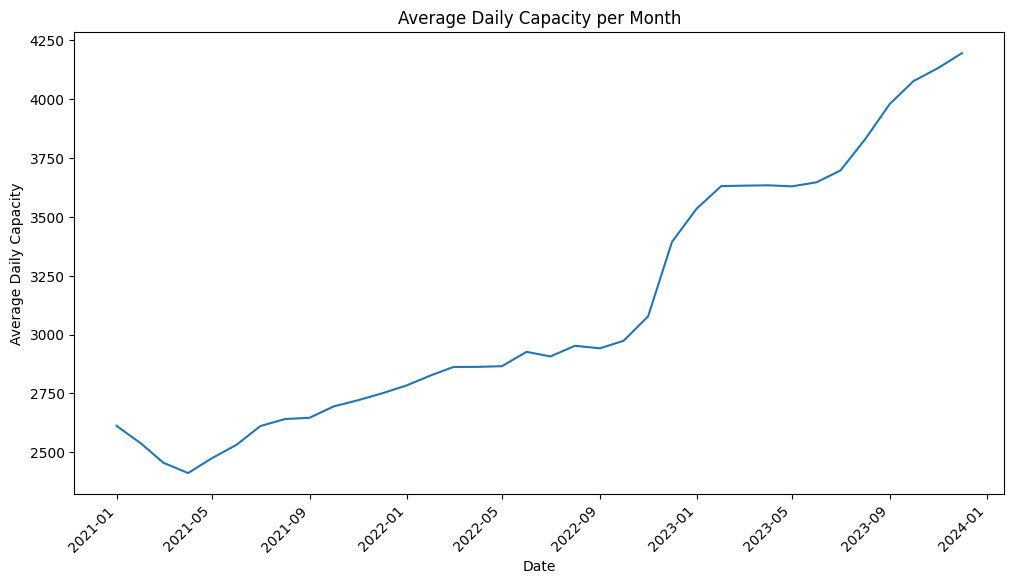

In [111]:
plt.figure(figsize=(12, 6)) 
plot = sns.lineplot(data=merged_calls_other_flow_monthly, x='Date', y='average_other_daily_capacity')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right') 
plt.xlabel('Date')
plt.ylabel('Average Daily Capacity')
plt.title('Average Daily Capacity per Month')
plt.show()